# Industry Assignment - 1

In [233]:
# Getting current working directory path

import os
os.getcwd()

'/home/user780/user780/AI_Assignment_1'

In [234]:
# Importing the necessary libraries.

import numpy as np # Importing numpy for numerical computation
import pandas as pd # Importing pandas for working with pre-processing and manipulation of dataframes
import matplotlib.pyplot as plt # Plotting library matplotlib
import seaborn as sns # Plotting library seaborn
from sklearn.preprocessing import LabelEncoder # Pre-processing categorical data
from sklearn.preprocessing import MinMaxScaler # pre-processing or Scalling features to 0 to 1 or -1 to 1
from sklearn.model_selection import train_test_split # Spliting the dataset in to train and test sets
from sklearn.metrics import r2_score # Accuracy metrics:- r2_score is mostly used for regresion models
from sklearn.metrics import mean_squared_error, mean_absolute_error # importing metrics
from sklearn.linear_model import LinearRegression # importing linear model from sklearn for muli-linear regression
from sklearn.preprocessing import PolynomialFeatures # pre-processing for polynomial model(non-linear model)


## 1 - Data Collection - Completeness and correctness of data collection

In [235]:
# Creating a dataframe by using read_csv() function as gdpWorld.csv is a comma seperated file.

df = pd.read_csv('/home/user780/user780/AI_Assignment_1/gdpWorld.csv')
df.head(2)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"


## 2 - Data preparation - cleansing and preparing data for the next steps of model development

In [236]:
df.dtypes # Checking datatypes of all columns

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [237]:
# Renaming the columns to simply the column naming convention

df.rename(columns = {'Area (sq. mi.)':'Area'}, inplace = True)
df.rename(columns = {'Coastline (coast/area ratio)':'Coastline'}, inplace = True)
df.rename(columns = {'Net migration':'Net_migration'}, inplace = True)
df.rename(columns = {'Infant mortality (per 1000 births)':'Infant_mortality'}, inplace = True)
df.rename(columns = {'GDP ($ per capita)':'GDP'}, inplace = True)
df.rename(columns = {'Literacy (%)':'Literacy'}, inplace = True)
df.rename(columns = {'Phones (per 1000)':'Phones'}, inplace = True)
df.rename(columns = {'Arable (%)':'Arable'}, inplace = True)
df.rename(columns = {'Other (%)':'Other'}, inplace = True)
df.rename(columns = {'Pop. Density (per sq. mi.)':'Pop_Density'}, inplace = True)
df.rename(columns = {'Crops (%)':'Crops'}, inplace = True)
df.rename(columns = {'Net migration':'Net_migration'}, inplace = True)
df.columns

Index(['Country', 'Region', 'Population', 'Area', 'Pop_Density', 'Coastline',
       'Net_migration', 'Infant_mortality', 'GDP', 'Literacy', 'Phones',
       'Arable', 'Crops', 'Other', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [238]:
# Replacing the string character ',' to '' and changing type to float

df['Pop_Density'] = df['Pop_Density'].str.replace(',', '').astype(float) 
df['Coastline'] = df['Coastline'].str.replace(',', '').astype(float)
df['Net_migration'] = df['Net_migration'].str.replace(',', '').astype(float)
df['Infant_mortality'] = df['Infant_mortality'].str.replace(',', '').astype(float)
df['Literacy'] = df['Literacy'].str.replace(',', '').astype(float)
df['Phones'] = df['Phones'].str.replace(',', '').astype(float)
df['Arable'] = df['Arable'].str.replace(',', '').astype(float)
df['Crops'] = df['Crops'].str.replace(',', '').astype(float)
df['Other'] = df['Other'].str.replace(',', '').astype(float)
df['Climate'] = df['Climate'].str.replace(',', '').astype(float)
df['Birthrate'] = df['Birthrate'].str.replace(',', '').astype(float)
df['Deathrate'] = df['Deathrate'].str.replace(',', '').astype(float)
df['Agriculture'] = df['Agriculture'].str.replace(',', '').astype(float)
df['Industry'] = df['Industry'].str.replace(',', '').astype(float)
df['Service'] = df['Service'].str.replace(',', '').astype(float)

In [239]:
df.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_Density         float64
Coastline           float64
Net_migration       float64
Infant_mortality    float64
GDP                 float64
Literacy            float64
Phones              float64
Arable              float64
Crops               float64
Other               float64
Climate             float64
Birthrate           float64
Deathrate           float64
Agriculture         float64
Industry            float64
Service             float64
dtype: object

In [240]:
df.isna().sum() # Checking for null values in all the columns

Country              0
Region               0
Population           0
Area                 0
Pop_Density          0
Coastline            0
Net_migration        3
Infant_mortality     3
GDP                  1
Literacy            18
Phones               4
Arable               2
Crops                2
Other                2
Climate             22
Birthrate            3
Deathrate            4
Agriculture         15
Industry            16
Service             15
dtype: int64

In [241]:
# Grouping by Region and getting the median of the each columns.

df.groupby('Region')[['Net_migration', 'Infant_mortality', 'GDP', 'Literacy', 'Phones',
       'Arable', 'Crops', 'Other', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service']].median()

,Net_migration,Infant_mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Region,,,,,,,,,,,,,,
ASIA (EX. NEAR EAST),0.0,2411.0,3450.0,906.0,615.0,1172.5,99.0,7965.0,2.0,1620.0,673.5,92.0,254.5,403.0
BALTICS,-223.0,787.0,11400.0,998.0,3214.0,2967.0,47.0,6986.0,3.0,924.0,1325.0,4.0,294.0,666.0
C.W. OF IND. STATES,-67.5,2624.5,3450.0,990.5,1553.5,940.5,59.0,8424.5,3.0,1078.5,932.5,198.0,301.0,428.5
EASTERN EUROPE,-5.0,933.0,9100.0,986.0,2960.5,2812.5,215.5,6533.5,3.0,965.0,1031.0,65.0,308.0,579.0
LATIN AMER. & CARIB,-91.0,1518.0,6300.0,940.5,2228.5,656.0,171.0,8243.0,2.0,1759.0,598.0,37.0,156.0,533.0
NEAR EAST,35.5,1798.0,9250.0,830.0,2110.0,280.0,278.0,8692.0,1.0,2159.5,403.0,26.5,307.5,454.5
NORTHERN AFRICA,-39.0,2477.0,6000.0,700.0,1236.0,304.5,36.5,9659.0,1.0,2198.0,513.0,132.0,357.0,361.5
NORTHERN AMERICA,249.0,754.0,29800.0,975.0,6832.0,496.0,0.0,8065.0,2.0,1352.0,774.0,1.0,204.0,684.0
OCEANIA,0.0,1262.0,5000.0,950.0,1186.0,212.0,465.0,5442.0,2.0,2232.0,528.0,75.5,142.0,560.5


In [242]:
# Fill the null values

# If there is 0 null values in columns then do nothing.
# If column name is climate then grouping by region and at climate column applying a anonymous function for mode value to fill null values.
# else groupby region for all the columns and fill null values with mean of respective columns.
# Then iterating through all the unique values of the Region column and using loc to select the rows in a column where the Region is region
# and assigning the calculated value to the rows

for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = df.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = df.groupby('Region')[col].mean()
    for region in df['Region'].unique():
        df[col].loc[(df[col].isnull())&(df['Region']==region)] = guess_values[region]

/usr/lib/python3/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [243]:
df.isna().sum() # Now, there are now null values in all the columns

Country             0
Region              0
Population          0
Area                0
Pop_Density         0
Coastline           0
Net_migration       0
Infant_mortality    0
GDP                 0
Literacy            0
Phones              0
Arable              0
Crops               0
Other               0
Climate             0
Birthrate           0
Deathrate           0
Agriculture         0
Industry            0
Service             0
dtype: int64

In [244]:
# Pre-processing categorical variable into numerical form. 

LE = LabelEncoder()
df['Country'] = LE.fit_transform(df['Country'])
df['Region'] = LE.fit_transform(df['Region'])
df.head(10)

,Country,Region,Population,Area,Pop_Density,Coastline,Net_migration,Infant_mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,0,31056997,647500,480.0,0.0,2306.0,16307.0,700.0,360.0,32.0,1213.0,22.0,8765.0,1.0,466.0,2034.0,38.0,24.000000,38.000
1,1,3,3581655,28748,1246.0,126.0,-493.0,2152.0,4500.0,865.0,712.0,2109.0,442.0,7449.0,3.0,1511.0,522.0,232.0,188.000000,579.000
2,2,6,32930091,2381740,138.0,4.0,-39.0,31.0,6000.0,700.0,781.0,322.0,25.0,9653.0,1.0,1714.0,461.0,101.0,6.000000,298.000
3,3,8,57794,199,2904.0,5829.0,-2071.0,927.0,8000.0,970.0,2595.0,10.0,15.0,75.0,2.0,2246.0,327.0,115.5,169.687500,473.375
4,4,10,71201,468,1521.0,0.0,66.0,405.0,19000.0,1000.0,4972.0,222.0,0.0,9778.0,3.0,871.0,625.0,18.2,159.458333,492.625
5,5,9,12127071,1246700,97.0,13.0,0.0,19119.0,1900.0,420.0,78.0,241.0,24.0,9735.0,2.0,4511.0,242.0,96.0,658.000000,246.000
6,6,4,13477,102,1321.0,5980.0,1076.0,2103.0,8600.0,950.0,4600.0,0.0,0.0,100.0,2.0,1417.0,534.0,4.0,18.000000,78.000
7,7,4,69108,443,1560.0,3454.0,-615.0,1946.0,11000.0,890.0,5499.0,1818.0,455.0,7727.0,2.0,1693.0,537.0,38.0,22.000000,743.000
8,8,4,39921833,2766890,144.0,18.0,61.0,1518.0,11200.0,971.0,2204.0,1231.0,48.0,8721.0,3.0,1673.0,755.0,95.0,358.000000,547.000
9,9,2,2976372,29800,999.0,0.0,-647.0,2328.0,3500.0,986.0,1957.0,1755.0,23.0,8015.0,4.0,1207.0,823.0,239.0,343.000000,418.000


In [245]:
df.dtypes

Country               int64
Region                int64
Population            int64
Area                  int64
Pop_Density         float64
Coastline           float64
Net_migration       float64
Infant_mortality    float64
GDP                 float64
Literacy            float64
Phones              float64
Arable              float64
Crops               float64
Other               float64
Climate             float64
Birthrate           float64
Deathrate           float64
Agriculture         float64
Industry            float64
Service             float64
dtype: object

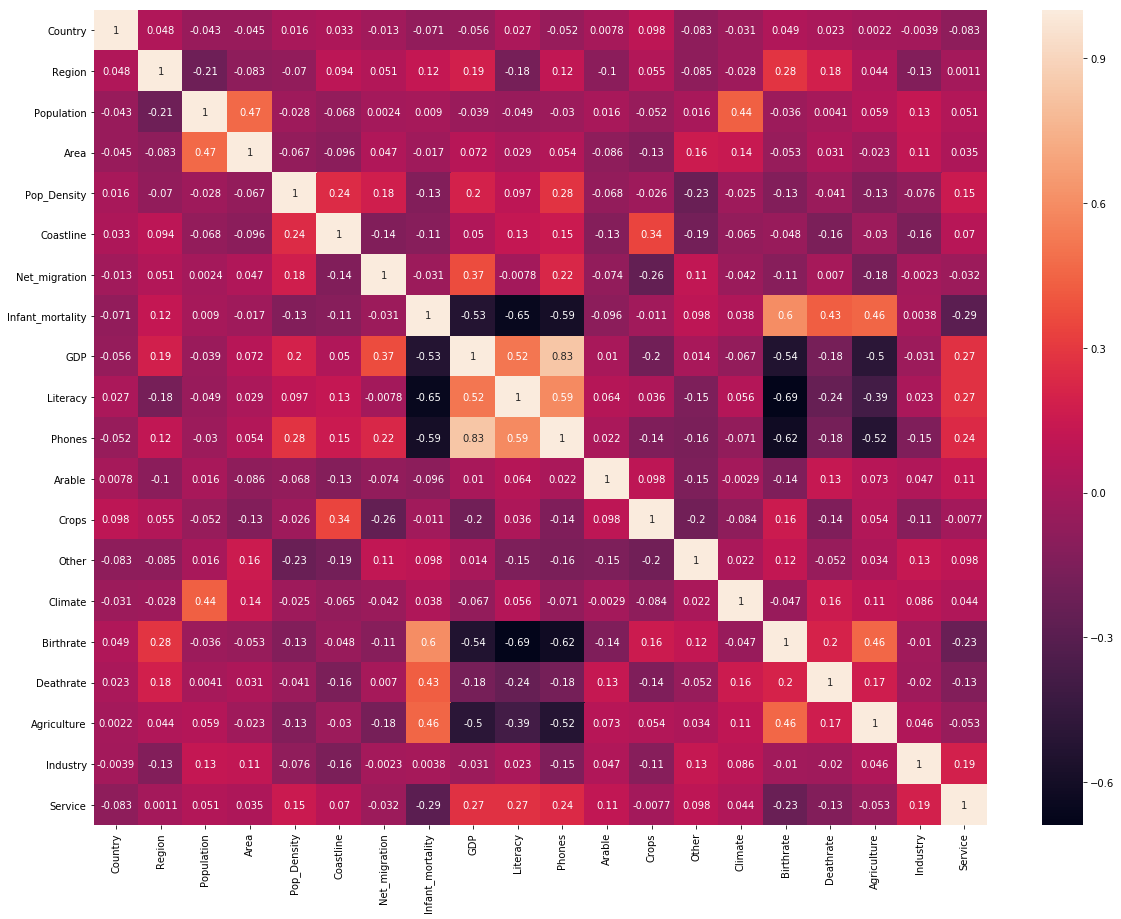

In [246]:
# Co-relation plot of all the feature vectors that are highly co-related with the target variable.

plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(),annot=True)
plt.show()

# From the below co-relation diagram we can see that the co-relation of the target variable GDP is more co-related with below feature space:-
# 'Phones', 'Literacy', 'Net_migration', 'Service', 'Pop_Density', 'Region'

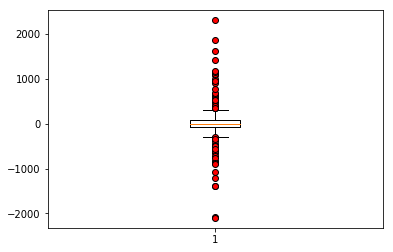

In [247]:
# Plotting Box plot or 5 number summary to see the distribution and outliers.

red_circle = dict(markerfacecolor = 'red', marker='o')
plt.boxplot(df['Net_migration'], flierprops=red_circle)
plt.show() # 'Net_migration', 'Literacy', 'Phones', 'Other', 'Agriculture', 'Service'

In [248]:
# Dealing with outliers using the capping method. Rather than deleting the outliers capping the outlieres are better choice.
# Capping method is a method where I have added the outliers that was present to the left and right tail of the normal distrubution.

for i in df.columns:
    percentile25 = df[i].quantile(0.25)
    percentile75 = df[i].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    df[i] = np.where(df[i] > upper_limit, upper_limit, 
    np.where(
        df[i] < lower_limit, lower_limit, df[i]
    ))

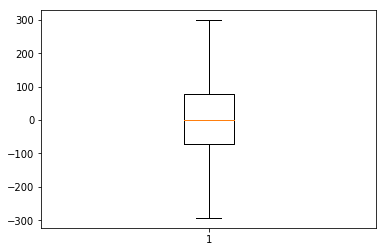

In [249]:
# Now, There is no outliers

red_circle = dict(markerfacecolor = 'red', marker='o')
plt.boxplot(df['Net_migration'], flierprops=red_circle) # 'Net_migration', 'Literacy', 'Phones', 'Other', 'Agriculture', 'Service'
plt.show() 

## 3 - Pre-processing the Independent and dependent variables and QA testing

In [250]:
# Creating independent (X) and dependent variable (y) and scaling it to 0 to 1 or or -1 to 1

# QA Testing for best 6 features after linear and non-linear models are created:-

# Features with high co-relation with target.
# X = df[['Phones', 'Literacy', 'Net_migration', 'Service', 'Pop_Density', 'Region']]

# X = df[['Region', 'Coastline', 'Net_migration', 'Phones', 'Agriculture', 'Service']]

X = df[['Net_migration', 'Literacy', 'Phones', 'Other', 'Agriculture', 'Service']]
y = df[['GDP']]

scaler = MinMaxScaler()
norm_df = scaler.fit_transform(X)
X_norm = pd.DataFrame(norm_df, columns = X.columns) 
X = X_norm
X.head(2)

,Net_migration,Literacy,Phones,Other,Agriculture,Service
0,1.0,0.000000,0.003336,0.874241,0.103754,0.035789
1,0.0,0.770213,0.078950,0.740017,0.633447,0.605263


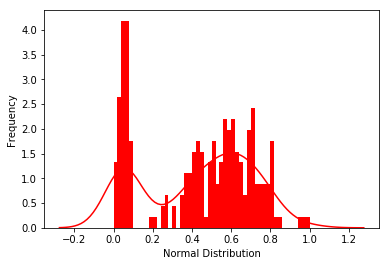

In [251]:
# Distribution plot to see the distribution of the data and check if the values are normalized or not.
ax = sns.distplot(X.Service,
                  bins=50,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
 
plt.show()

In [252]:
# min - max scaling for target variable (y)

scaler = MinMaxScaler()
norm_df = scaler.fit_transform(y)
y_norm = pd.DataFrame(norm_df, columns = y.columns) 
y = y_norm
y.head(2)

,GDP
0,0.005571
1,0.111421


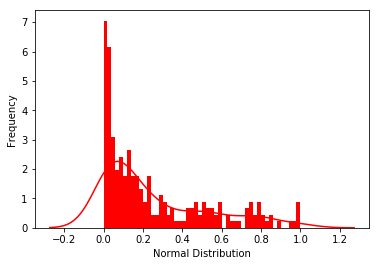

In [253]:
# Distribution plot of target variables to see the distribution of the data and check if the values are normalized or not.
ax = sns.distplot(y.GDP,
                  bins=50,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
 
plt.show()

In [254]:
# Splitting the dataset into Train and test.
# Where, X_train and y_train will be for training and X_test and y_test will be for testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)
print(f"X train: {X_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y train: {y_train.shape}")
print(f"y test: {y_test.shape}")

X train: (170, 6)
X test: (57, 6)
y train: (170, 1)
y test: (57, 1)


## 3 - Algorithm Understanding - Knowledge of the algorithm used for model development

In [255]:
# Simple linear regression model will not efficiently work well in this case. 
# Because in simple linear regression to work there has to be only one Independent variable 
# and one dependent variable
# Equation of the simple linear regression:-
# y = beta_0 + beta_1 * X
# Where, 
# y is dependent variable and X is independent variable.
# beta_o is y - intercept
# beta_1 is Coefficient.

# Therefore I have used Muiltiple linear model for the linear regression.

# Multiple Linear model:-

# Multiple linear regression model is best sutable for this problem because, 
# We have more than one Independent variables (X) and single dependent variable (y).
# equation of the non-linear regression:- 
# y = beta_0 + beta_1 * X_1 + beta_2 * X_2 ... beta_n * X_n
# Where,
# y is dependent variable
# X_1, X_2 ... X_n are features or independent variables
# beta_0 :- y-intercept
# beta_1, beta_2 ... beta_n :- Represent the coefficients.

# Non - Linear model (polynomial model):-

# Non - linear model are the model that are not linear, such that the equation of the line 
# is not straight but polynomial of degree more than 1.
# If the polynomial line is degree one then that line is linear in nature
# equation of the polynomial line
# y = beta_0 + beta_1 * X_1 ^ 1 + beta_2 * X_2 ^ 2 ... beta_n * X_n ^ n
# where,
# y :- Dependent variable
# beta_0 :- y-intercept
# beta_1, beta_2 ... beta_n :- Coefficients of Curve line
# X_1, X_2 ... X_n :- Independent variable.


## 4 - Model Development and Model Evaluation 

In [256]:
# Fitting the linear model without hyperparameter tuning 
# and predicting the accuracy and errors
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

Accuracy = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) * 100
mae = mean_absolute_error(y_test, y_pred) * 100

print(f"Linear model R2 Score accuracy is: {Accuracy * 100}")
print("Linear model Root Mean Square Error: ", rmse)  
print("Linear Model Mean absolute error: ", mae) 

Linear model R2 Score accuracy is: 64.8421831409428
Linear model Root Mean Square Error:  13.391018174714453
Linear Model Mean absolute error:  9.765821082183782


## 5 - Model Tuning and Model Evaluation 

In [257]:
# Fitting the linear model with hyperparameter tuning and predicting the accuracy and errors
# After the hyperparameter tuning the linear model accuracy is same as default hyperparameters.
lr_model = LinearRegression(fit_intercept=False, copy_X=False, n_jobs=10, positive = True)

lr_model.fit(X_train, y_train)
y_pred = lr_model2.predict(X_test)

Accuracy = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) * 100
mae = mean_absolute_error(y_test, y_pred) * 100

print(f"Linear model R2 Score accuracy is: {Accuracy * 100}")
print("Linear model Root Mean Square Error: ", rmse)  
print("Linear Model Mean absolute error: ", mae) 

Linear model R2 Score accuracy is: 64.8421831409428
Linear model Root Mean Square Error:  13.391018174714453
Linear Model Mean absolute error:  9.765821082183782


## Non-linear model

## 4 - Model Development and Model Evaluation 

In [258]:
# Applying polynomial regression degree 2 without hyperparamter tuning
poly = PolynomialFeatures(degree=2) 
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.transform(X_test)

#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

rmse = np.sqrt(mean_squared_error(y_test, y_pred)) * 100
mae = mean_absolute_error(y_test, y_pred) * 100

print("Polynomial R2 Score accuracy is: ", r2_score(y_test, y_pred) * 100)
print("polynomial Root mean square error: ", rmse)  
print("polynomial Mean absolute error: ", mae)  

Polynomial R2 Score accuracy is:  52.28569462801077
polynomial Root mean square error:  15.600084564780776
polynomial Mean absolute error:  12.05899825294434


## 5 - Model Tuning and Model Evaluation 

In [259]:
# Applying polynomial regression degree 2 with parameter tuning.
# After tuning the hyperparameter there is improvement in the model r2 score accuracy.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False, order='C') 
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.transform(X_test)

#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

rmse = np.sqrt(mean_squared_error(y_test, y_pred)) * 100
mae = mean_absolute_error(y_test, y_pred) * 100

print("Polynomial R2 Score accuracy is: ", r2_score(y_test, y_pred) * 100)
print("polynomial Root mean square error: ", rmse)  
print("polynomial Mean absolute error: ", mae) 

Polynomial R2 Score accuracy is:  78.00601521938985
polynomial Root mean square error:  10.591430233148891
polynomial Mean absolute error:  7.9270031867458455


## 6 - Conclusion

### Linear model R2 Score accuracy is: 64.8421831409428
### Linear model Root Mean Square Error:  13.391018174714453
### Linear Model Mean absolute error:  9.765821082183782

<b>------------------------------------------------------------------------------------------------------------------------------------</b>

### Polynomial R2 Score accuracy is:  78.00601521938985
### polynomial Root mean square error:  10.591430233148891
### polynomial Mean absolute error:  7.9270031867458455

<b>------------------------------------------------------------------------------------------------------------------------------------</b>

### After comparing linear and non-linear

## Answer:-  Non-Linear model is more accurate then linear model